In [0]:
#importing all neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import os

In [0]:
df = pd.read_csv('/content/drive/My Drive/cardio_train.csv', sep=';')

In [0]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [0]:
df.shape

(69301, 13)

In [0]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [0]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [0]:
df['age'] = (df['age']/365).round().astype(int)

In [0]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,62,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60,1,165,70.0,120,80,1,1,0,0,1,0
3,991,40,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64,1,155,62.0,120,80,1,1,0,0,1,0


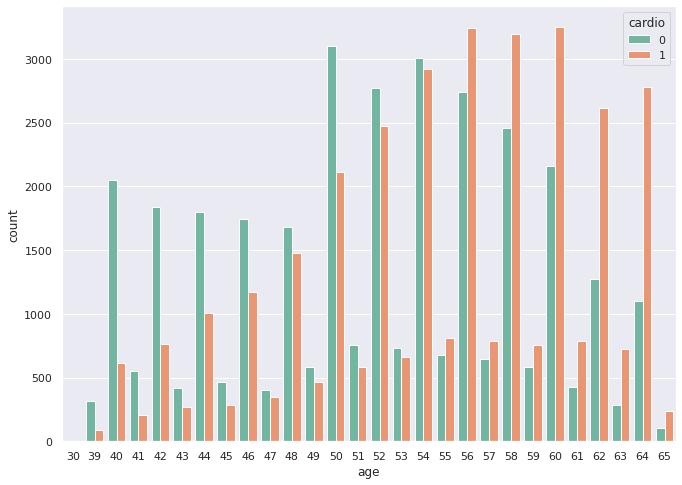

In [0]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='cardio', data = df, palette="Set2")

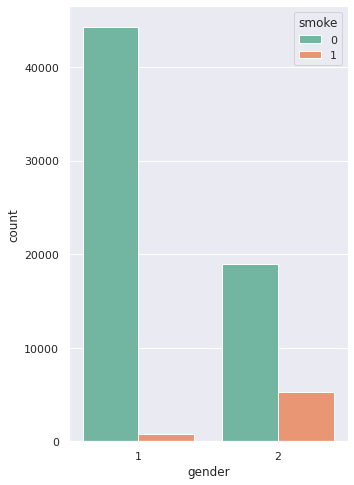

In [0]:
rcParams['figure.figsize'] = 5, 8
sns.countplot(x='gender', hue='smoke', data = df, palette="Set2")

In [0]:
df['cardio'].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

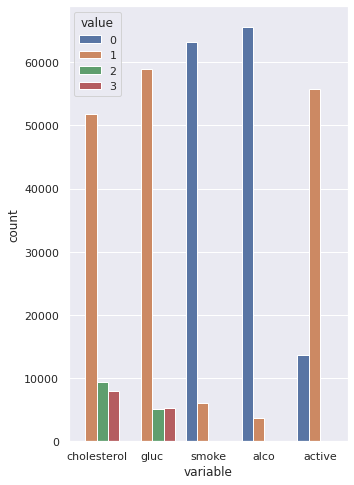

In [0]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value", data= pd.melt(df_categorical))

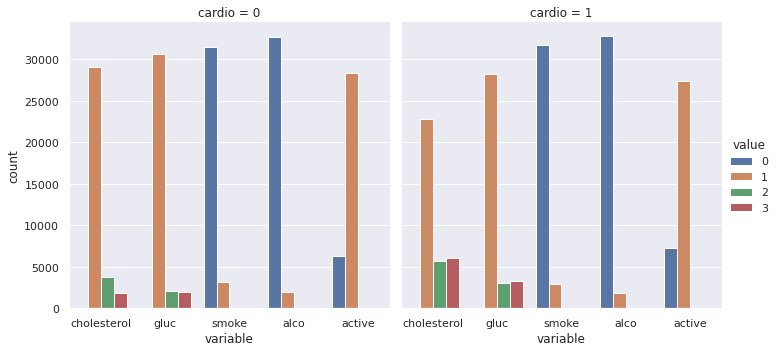

In [0]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio", data=df_long, kind="count")


In [0]:
df.groupby('gender')['height'].mean()

gender
1    161.358659
2    169.952068
Name: height, dtype: float64

In [0]:
df['gender'].value_counts()

1    45079
2    24222
Name: gender, dtype: int64

In [0]:
df.groupby('gender')['alco'].sum()

gender
1    1153
2    2581
Name: alco, dtype: int64

In [0]:
df.groupby('gender')['weight'].mean()

gender
1    72.561969
2    77.257163
Name: weight, dtype: float64

In [0]:
df['cardio'].value_counts(normalize=True)

0    0.500411
1    0.499589
Name: cardio, dtype: float64

In [0]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,62,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60,1,165,70.0,120,80,1,1,0,0,1,0
3,991,40,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64,1,155,62.0,120,80,1,1,0,0,1,0


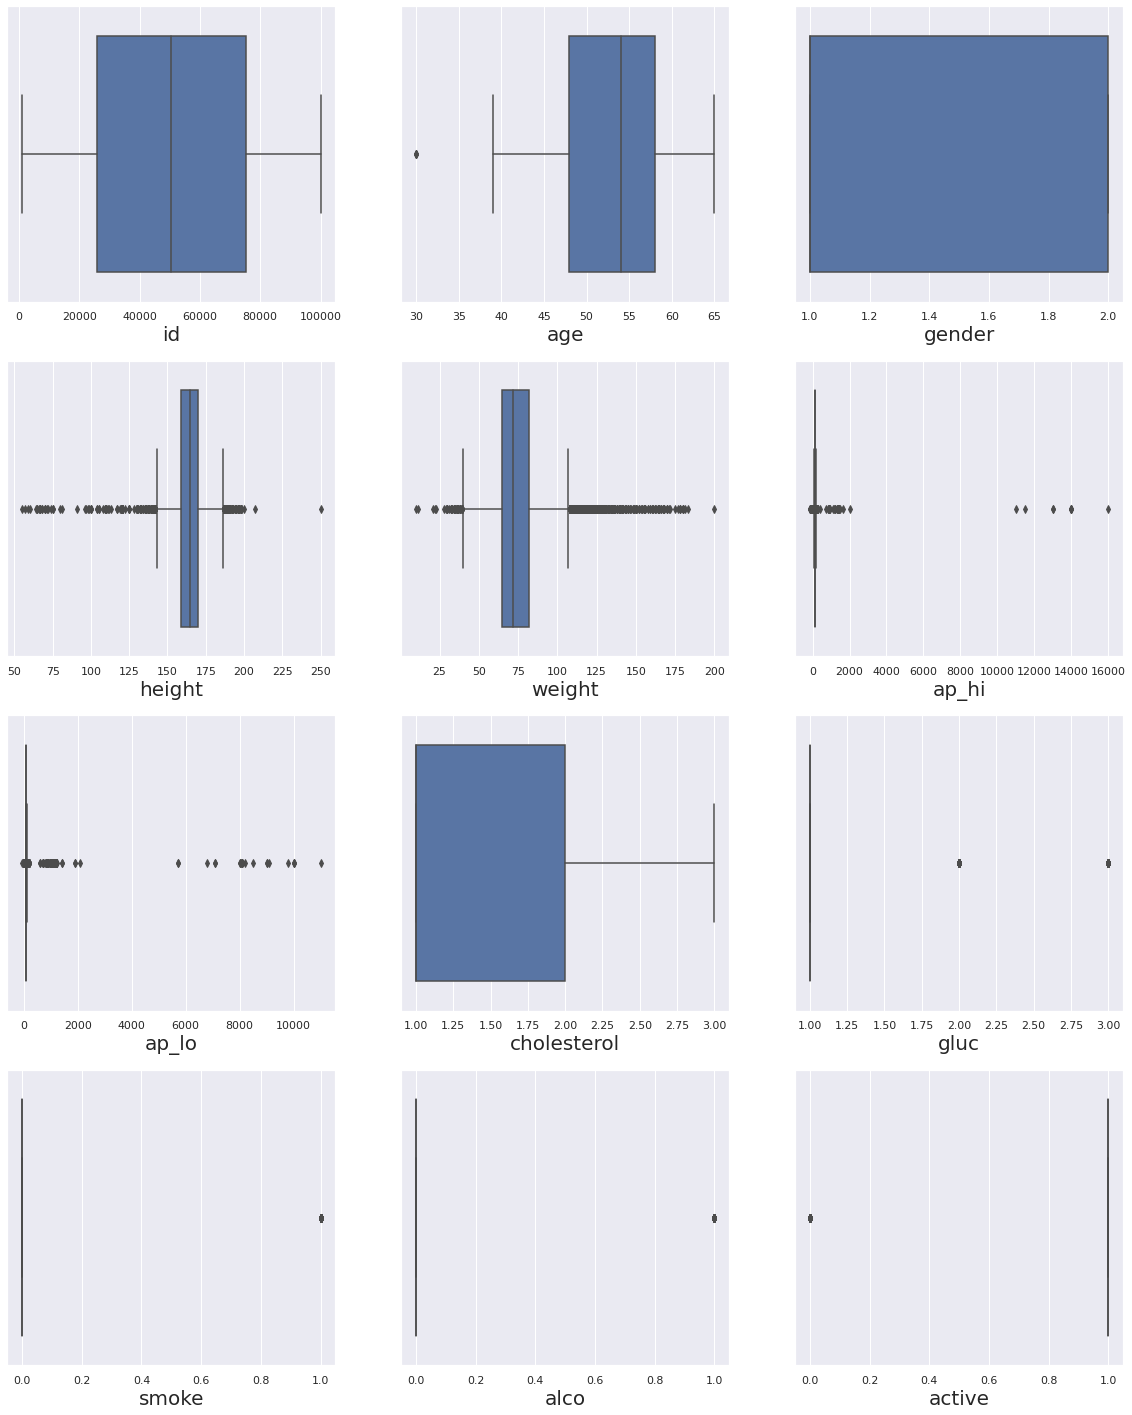

In [0]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=12 :     # as there are 12 columns in the data
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [0]:
df.drop(['id'], axis=1, inplace=True)

In [0]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,62,1,155,69.0,130,80,2,2,0,0,1,0
1,40,1,163,71.0,110,70,1,1,0,0,1,1
2,60,1,165,70.0,120,80,1,1,0,0,1,0
3,40,2,165,85.0,120,80,1,1,1,1,1,0
4,64,1,155,62.0,120,80,1,1,0,0,1,0


In [0]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In [0]:
print("Diastilic blood pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic blood pressure is higher than systolic one in 1070 cases


In [0]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

In [0]:
print("Diastilic blood pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic blood pressure is higher than systolic one in 0 cases


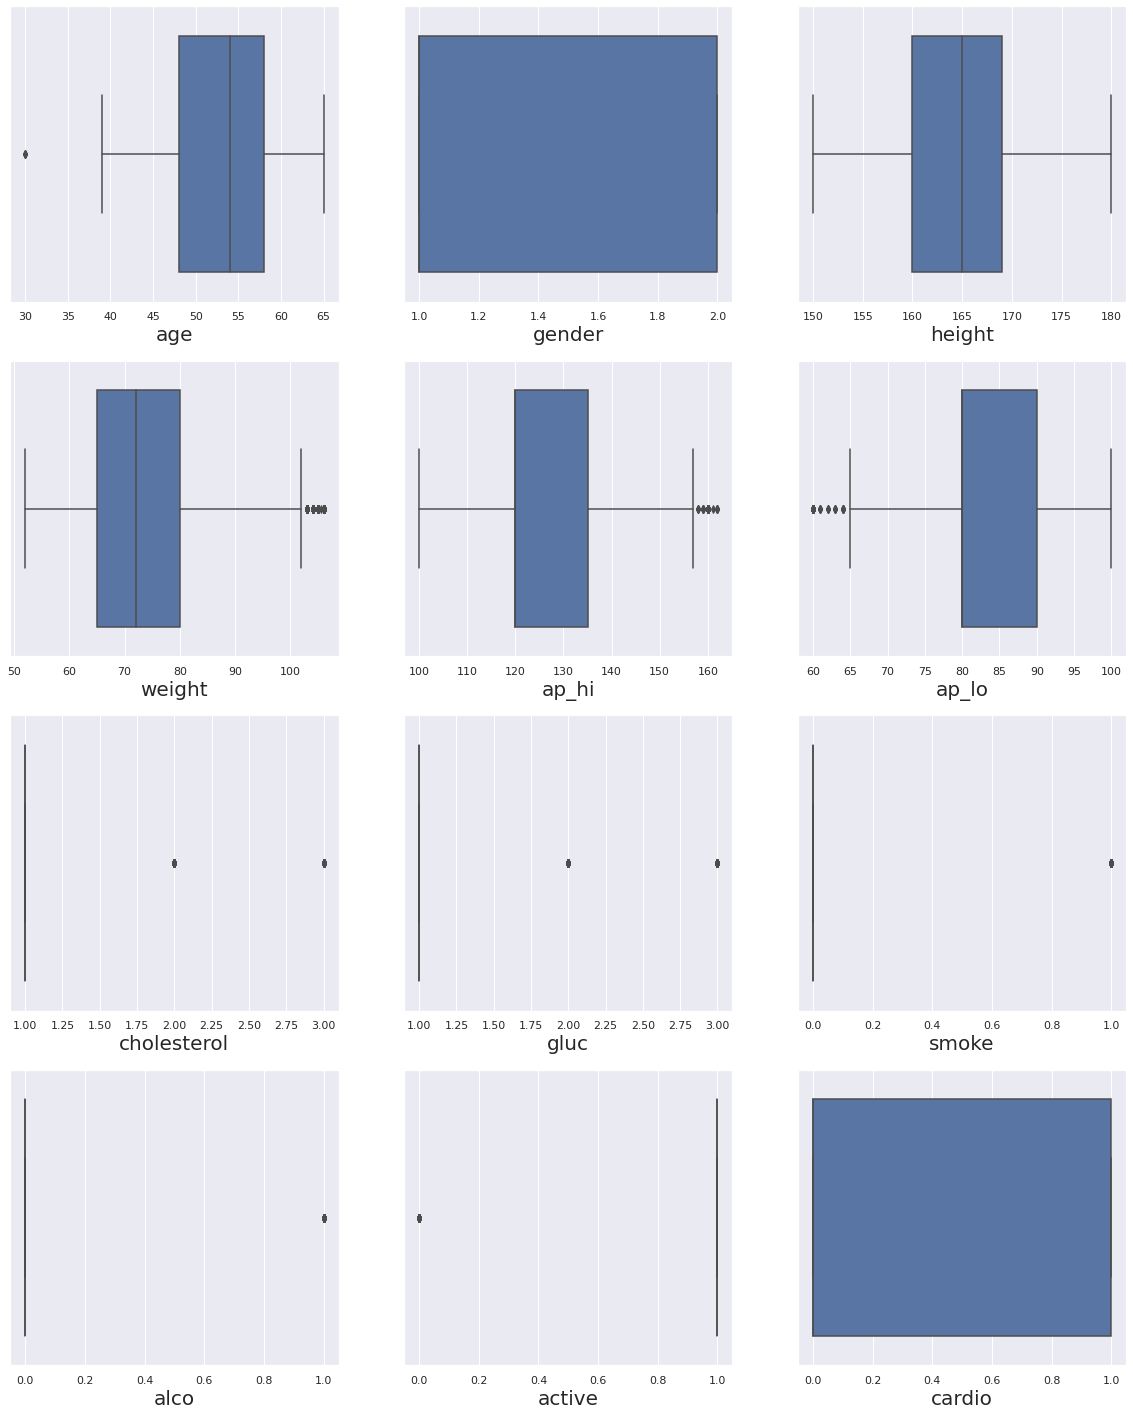

In [0]:
# let's see how data is distributed for every column after remove outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=12 :     # as there are 12 columns in the data
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

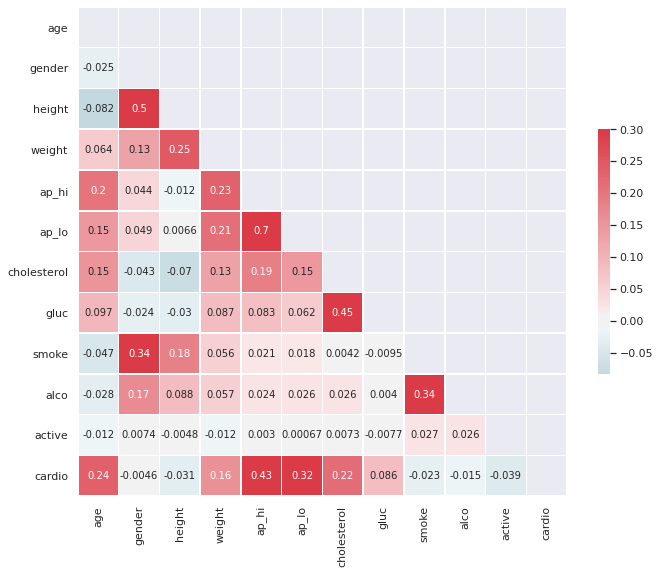

In [0]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

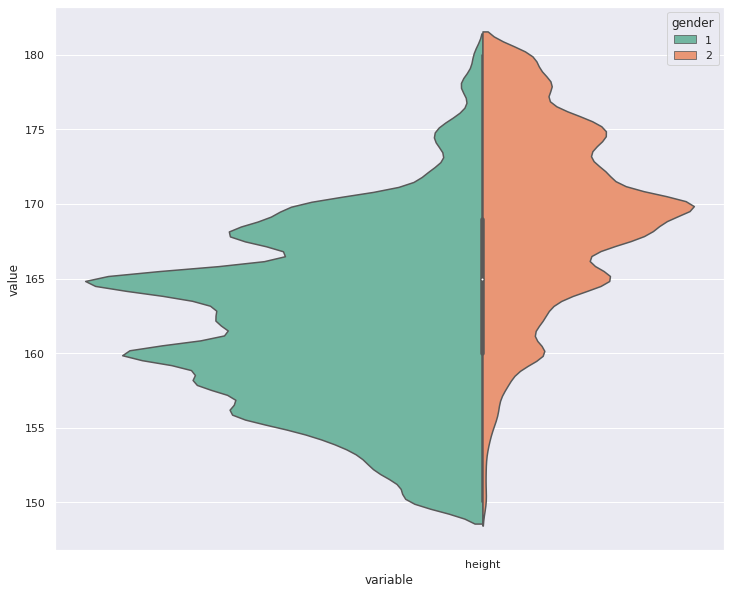

In [0]:

df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
     palette="Set2")

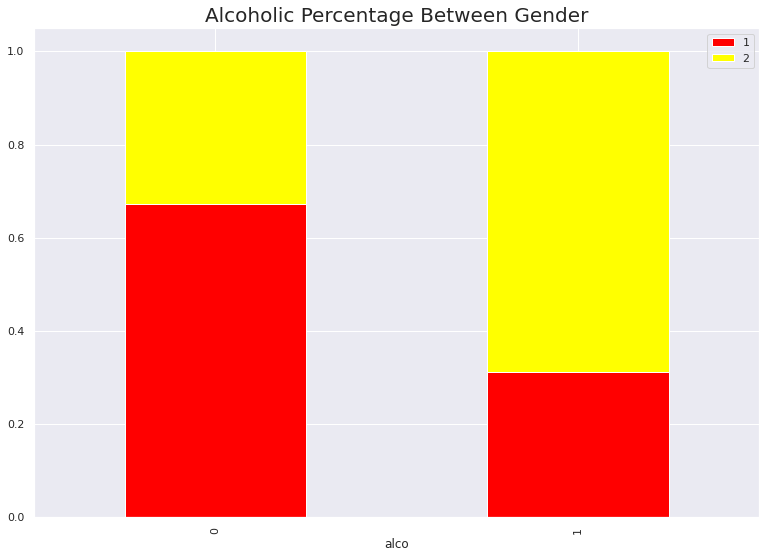

In [0]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(df['alco'], df['gender'])
Y.div(Y.sum(1).astype(int), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('Alcoholic Percentage Between Gender', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

In [0]:
df.shape   

(59555, 12)

In [0]:
df['cardio'].value_counts()

0    30490
1    29065
Name: cardio, dtype: int64

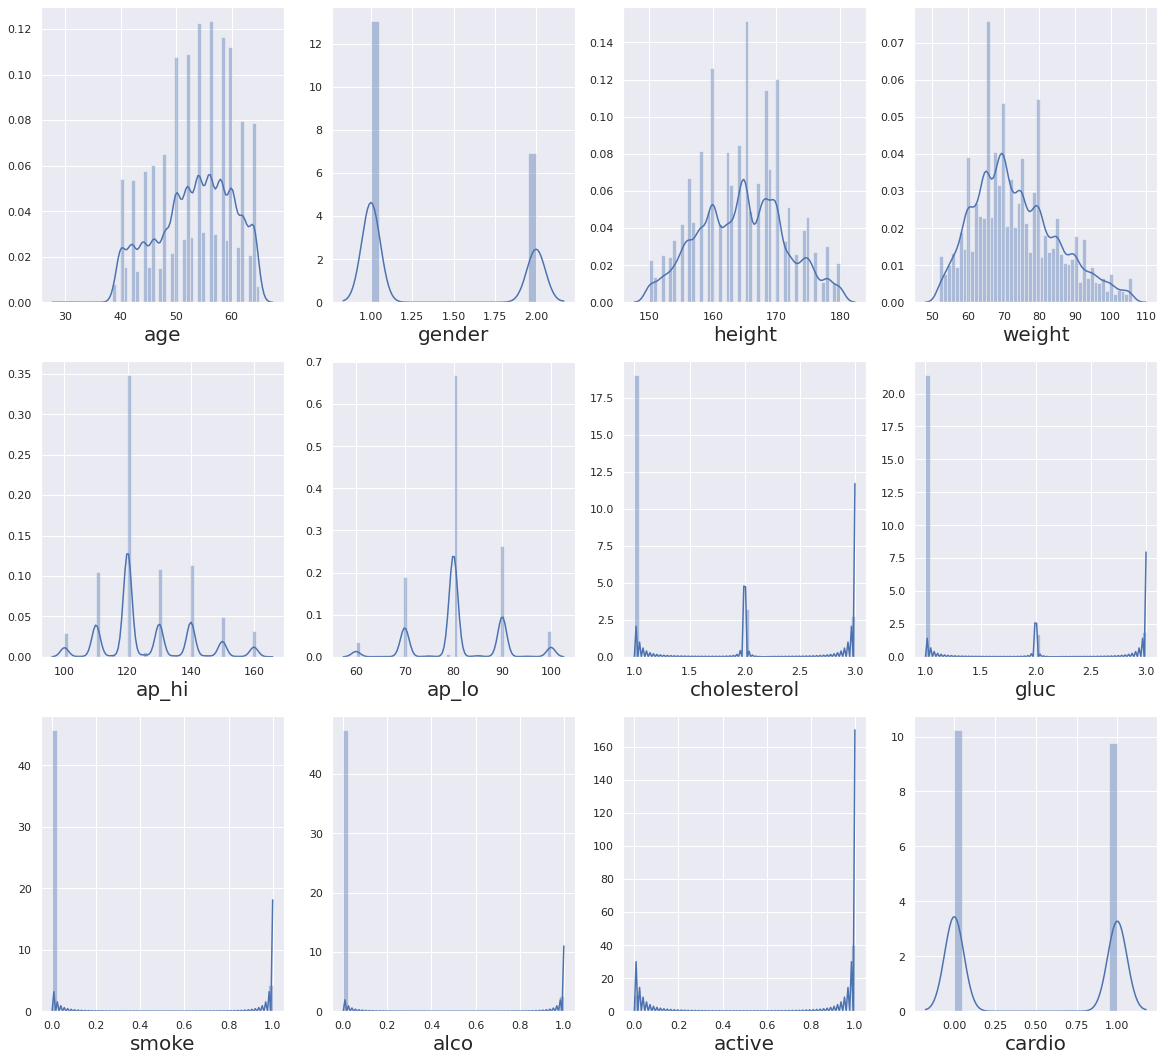

In [0]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=13: 
        try:
            ax = plt.subplot(4,4,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
        except:
             pass    
    plotnumber+=1
plt.show()

In [0]:
y = df['cardio']
X = df.drop(columns = ['cardio'])

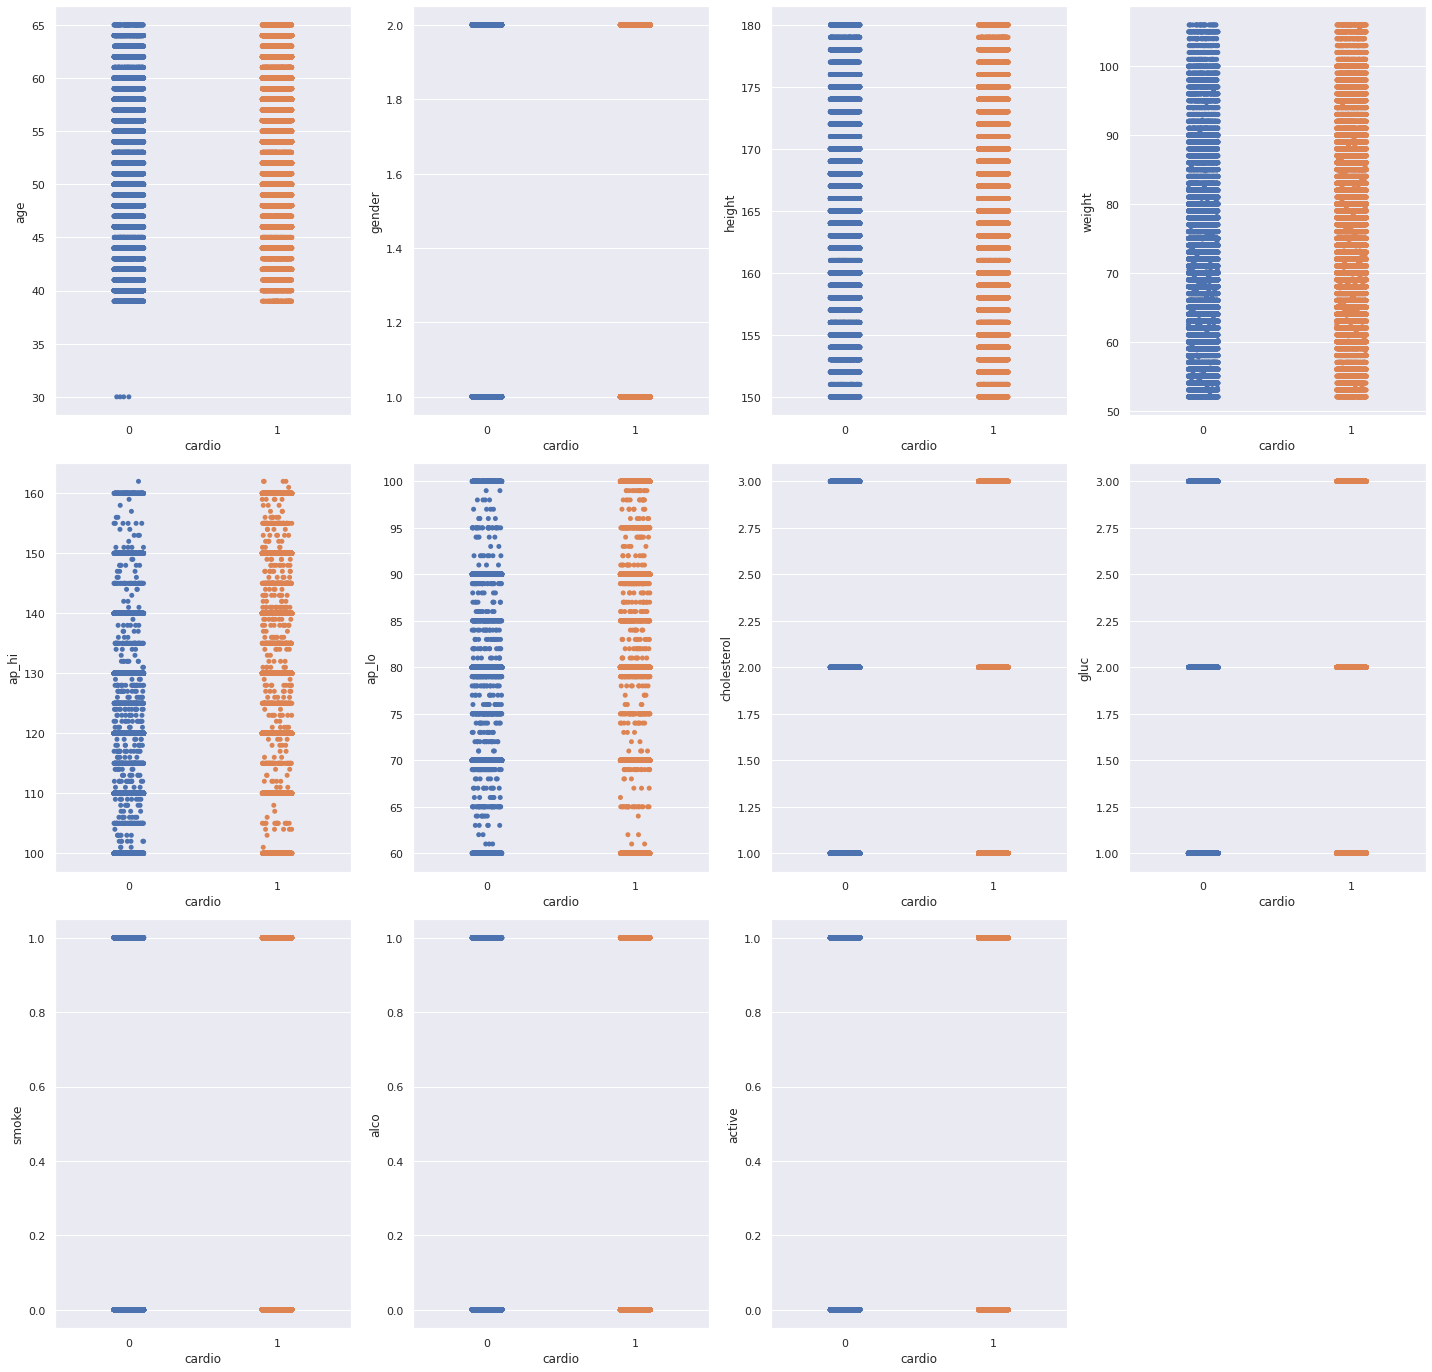

In [0]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=13 :
        ax = plt.subplot(4,4,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [0]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [0]:
#let's calculate variance inflation factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.068879,age
1,1.466149,gender
2,1.428176,height
3,1.154429,weight
4,2.027598,ap_hi
5,1.948501,ap_lo
6,1.322707,cholesterol
7,1.263082,gluc
8,1.248234,smoke
9,1.139527,alco


In [0]:
# let's split the training set again into training and test dataset 
x_train,x_test,y_train,y_test =  train_test_split(X_scaled,y,test_size=0.2, random_state= 355)

In [0]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr = LogisticRegression(C = 4.459, class_weight = 'balanced', fit_intercept = True, max_iter = 100, multi_class = 'auto', n_jobs = -1, penalty = 'l2', random_state = 6544)

In [0]:
lr.fit(x_train, y_train)

LogisticRegression(C=4.459, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=6544, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr.score(x_train, y_train)

0.7203845185122996

In [0]:
lr.score(x_test, y_test)

0.7263873730165393

In [0]:
from sklearn.model_selection import cross_val_score
log_reg = LogisticRegression(C = 4.459, class_weight = 'balanced', fit_intercept = True, max_iter = 100, multi_class = 'auto', n_jobs = -1, penalty = 'l2', random_state = 6544 )
#Fit algorithm on Data
log_reg.fit(x_train , y_train)
#Predict training data:
y_pred = log_reg.predict(x_test)
y_pred_prob = log_reg.predict_proba(x_test)[:,1]

#Perform Cross - Validation"
cv_score = cross_val_score(log_reg , x_train, y_train , cv= 5 , scoring='roc_auc')
#Print Model Report:
print("Model report")
print("Accuracy : " , accuracy_score(y_test ,y_pred ))
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
print('auc score :', auc)

Model report
Accuracy :  0.7263873730165393
auc score : 0.7243433958879185


In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

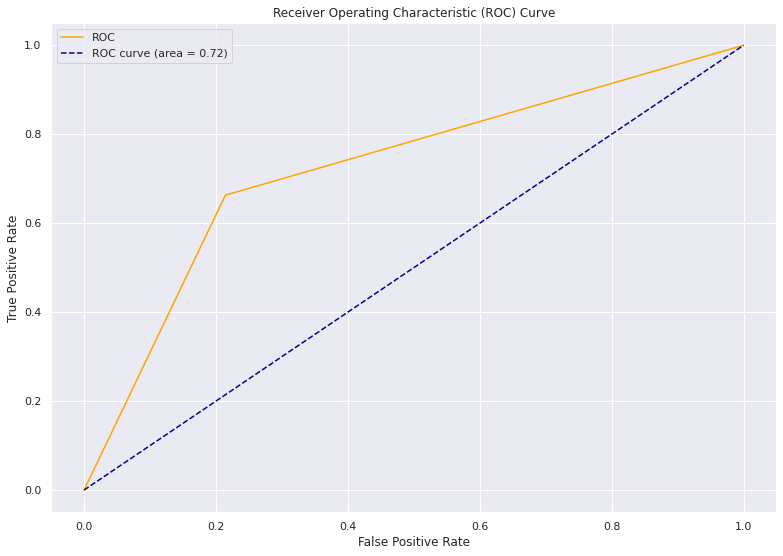

In [0]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [0]:
#Decision Tree
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
clf.score(x_train, y_train)

0.9729241877256317

In [0]:
clf.score(x_test,y_test)

0.62622785660314

In [0]:
#Second Hyperparameter tunning for Decision Tree
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,28,2),
    'min_samples_leaf' : range(1,15,2),
    'min_samples_split': range(2,15,1),
    'splitter' : ['best', 'random']
    
}

In [0]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                     n_jobs =-1, verbose=True)

In [0]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 4732 candidates, totalling 23660 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1444 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 3444 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6244 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 6862 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 7412 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 8062 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 8812 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 9662 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 10612 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 11662 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 15732 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 20732 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 22940 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 23660 out 

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [0]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 11,
 'min_samples_split': 7,
 'splitter': 'random'}

In [0]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf=11, min_samples_split=7, splitter = 'random')

In [0]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [0]:
clf.score(x_train, y_train)

0.7310889094114684

In [0]:
clf.score(x_test, y_test)

0.7172361682478381

In [0]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =10, min_samples_leaf= 11, min_samples_split= 7, splitter ='random')
#Fit algorithm on Data
clf.fit(x_train , y_train)
#Predict training data:
y_pred = clf.predict(x_test)
y_pred_prob = clf.predict_proba(x_test)[:,1]

#Perform Cross - Validation"
cv_score = cross_val_score(clf , x_train, y_train , cv= 5 , scoring='roc_auc')
cv_score
#Print Model Report:
print("Model report")
print("Accuracy : " , accuracy_score(y_test ,y_pred ))

Model report
Accuracy :  0.7216858366216102


In [0]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7187233707206651

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

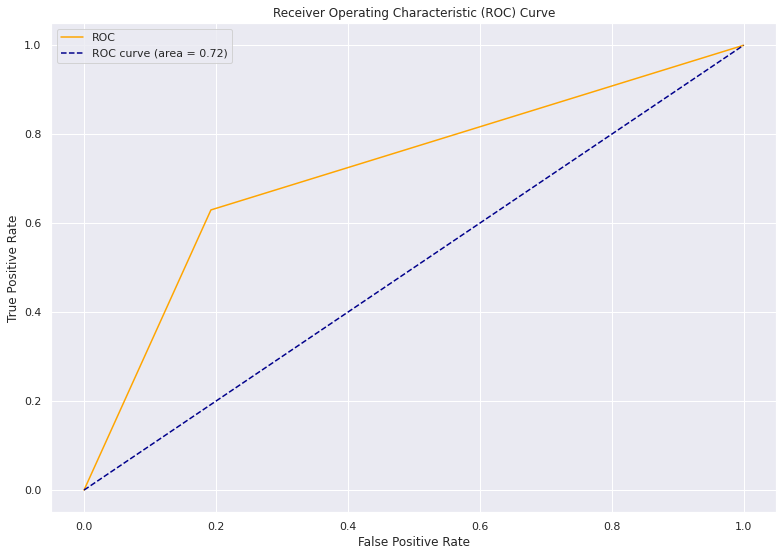

In [0]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [0]:
rand_clf = RandomForestClassifier(random_state=3)

In [0]:
rand_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [0]:
rand_clf.score(x_test, y_test)

0.6961632104777097

In [0]:
rand_clf1 = RandomForestClassifier(n_estimators = 90, max_depth = 10, criterion = 'entropy',max_features = 'auto', min_samples_leaf = 4, min_samples_split = 2, random_state = 6544, verbose = 0)

In [0]:
rand_clf1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=6544,
                       verbose=0, warm_start=False)

In [0]:
rand_clf1.score(x_train, y_train)

0.7444589035345479

In [0]:
rand_clf1.score(x_test, y_test)

0.7273108890941147

0.716375548575503

In [0]:
from sklearn.model_selection import cross_val_score
rand_forest = RandomForestClassifier(n_estimators = 90, max_depth = 10, criterion = 'entropy',max_features = 'auto', min_samples_leaf = 4, min_samples_split = 2, random_state = 6544, verbose = 0)
#Fit algorithm on Data
rand_forest.fit(x_train , y_train)
#Predict training data:
y_pred = rand_forest.predict(x_test)
y_pred_prob = rand_forest.predict_proba(x_test)[:,1]

#Perform Cross - Validation"
cv_score = cross_val_score(rand_forest , x_train, y_train , cv= 5 , scoring='roc_auc')
cv_score
#Print Model Report:
print("Model report")
print("Accuracy : " , accuracy_score(y_test ,y_pred))
# Area Under Curve

auc = roc_auc_score(y_test, y_pred)
print('auc score :', auc)

Model report
Accuracy :  0.7273108890941147
auc score : 0.7248617345014525


In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

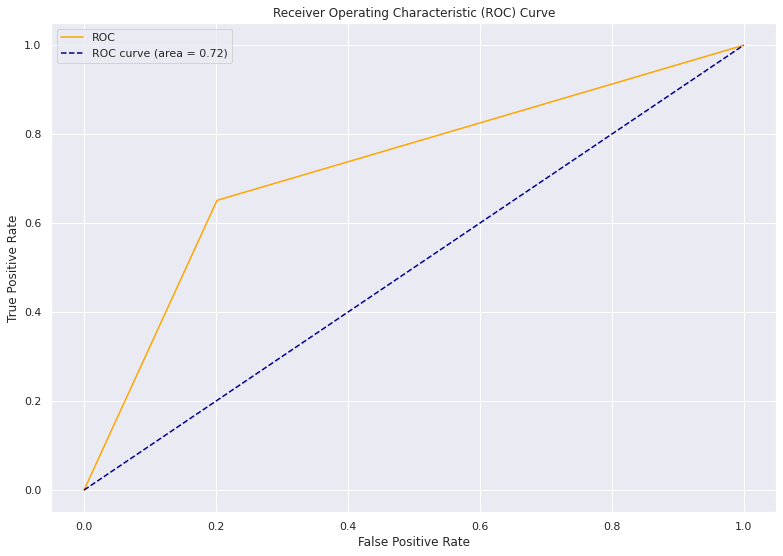

In [0]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [0]:
xg_boost = XGBClassifier(random_state = 6)

In [0]:
xg_boost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=6,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xg_boost.score(x_train, y_train)

0.7313197884308622

In [0]:
xg_boost.score(x_test, y_test)

0.7291579212492654

In [0]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [0]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [136]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.719, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.718, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.720, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.713, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.713, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.725, total=   0.9s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.728, total=   0.9s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.733, total=   0.9s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.720, total=   0.9s
[CV]  l

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 39.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50,

In [137]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 200}

In [0]:
xg_boost = XGBClassifier(learning_rate = 1, max_depth = 3, n_estimators = 200, random_state = 4512)

In [139]:
xg_boost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=4512, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [140]:
xg_boost.score(x_train, y_train)

0.7453824196121233

In [141]:
xg_boost.score(x_test, y_test)

0.7193350684241457

In [143]:
from sklearn.model_selection import cross_val_score
#hyperparameter tunning
xgboost = XGBClassifier(base_score = 0.5, booster = 'gbtree', learning_rate = 0.1, max_depth =3, n_jobs = 1, random_state = 3, subsample = 0.3, verbosity = 1)
#Fit algorithm on Data
xgboost.fit(x_train , y_train)
#Predict training data:
y_pred = xgboost.predict(x_test)
y_pred_prob = xgboost.predict_proba(x_test)[:,1]

#Perform Cross - Validation"
cv_score = cross_val_score(xgboost, x_train, y_train , cv= 5 , scoring='roc_auc')
cv_score
#Print Model Report:
print("Model report")
print("Accuracy : " , accuracy_score(y_test ,y_pred))
auc = roc_auc_score(y_test, y_pred)
print('auc score :', auc)

Model report
Accuracy :  0.7289900092351608
auc score : 0.7273383227517628


In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

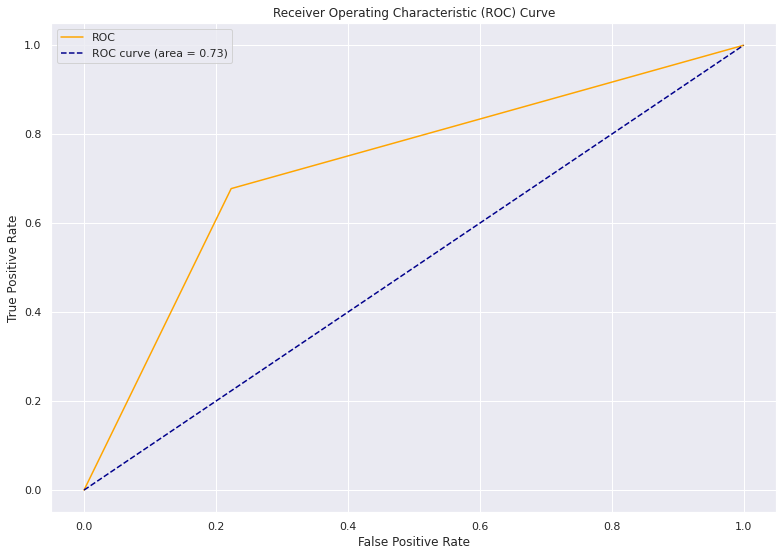

In [145]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [0]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

In [0]:
knn.score(x_train, y_train)

In [0]:
knn.score(x_test, y_test)

In [0]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

In [0]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [0]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [123]:
gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.669, total=   6.9s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.667, total=   7.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.9s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.673, total=   6.9s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.672, total=   6.7s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.676, total=   7.5s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.685, total=   7.2s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.691, total=   7.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.693, total=   7.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.686, total= 

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed: 81.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [124]:
gridsearch.best_params_


{'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 13}

In [0]:
knn1 = KNeighborsClassifier(algorithm='kd_tree', leaf_size=20, n_neighbors=13)

In [127]:
knn1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [129]:
knn1.score(x_train, y_train)

0.7488456049030308

In [130]:
knn1.score(x_test, y_test)

0.7100999076483923

In [132]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric = 'manhattan', n_neighbors=46, weights='uniform')
#Fit algorithm on Data
knn.fit(x_train , y_train)
#Predict training data:
y_pred = knn.predict(x_test)
y_pred_prob = knn.predict_proba(x_test)[:,1]

#Perform Cross - Validation"
cv_score = cross_val_score(knn , x_train, y_train , cv= 5 , scoring='roc_auc')
cv_score
#Print Model Report:
print("Model report")
print("Accuracy : " , accuracy_score(y_test ,y_pred))
# Area Under Curve

auc = roc_auc_score(y_test, y_pred)
print('auc score :', auc)

Model report
Accuracy :  0.7163126521702627
auc score : 0.7137252022929061


In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

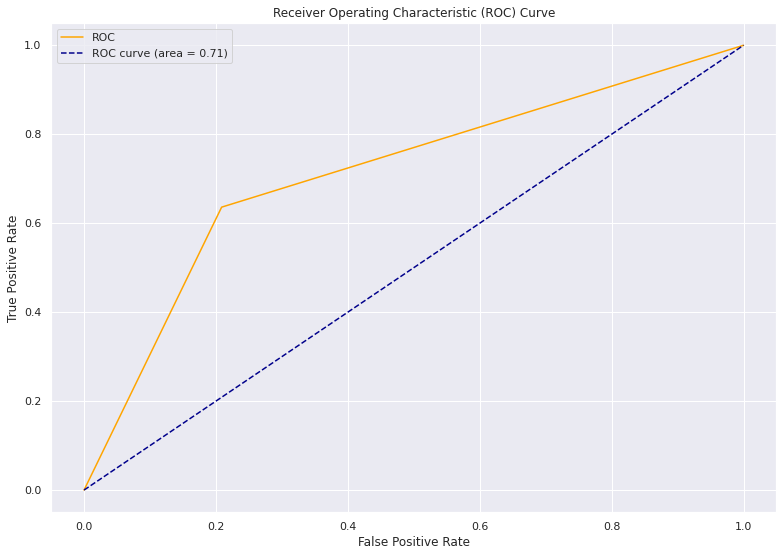

In [134]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

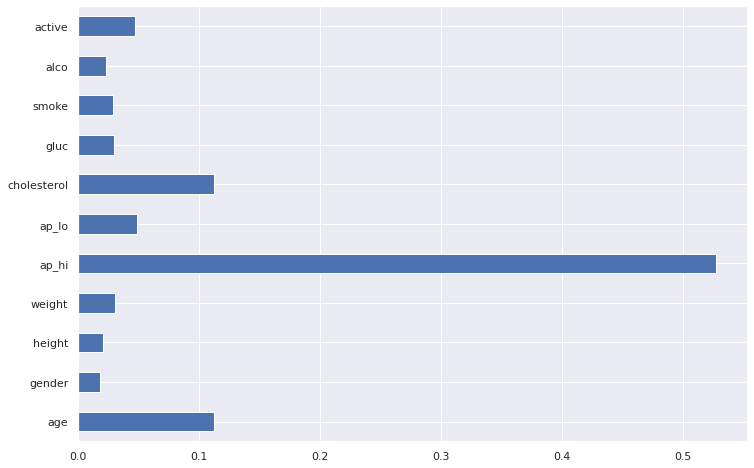

In [135]:
importances=pd.Series(xgboost.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

In [0]:
import pickle
filename = 'xgboost_model.pickle'
pickle.dump(xgboost, open(filename, 'wb'))



In [158]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scalar.transform([[53, 1, 165, 73, 126, 81, 1, 1, 0, 0, 1]]))
a

array([0])